<a href="https://colab.research.google.com/github/wli-dvl/amazon-ecommerce-data-analysis/blob/main/Car_Air_Freshener_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
# 1. Setup
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# 2. Load Data
reviews = pd.read_csv("Review Data.csv")
reviews = reviews[['Body', 'Rating']].dropna()
reviews = reviews.rename(columns={'Body': 'reviewText', 'Rating': 'overall'})

In [ ]:
# 3. Sentiment Analysis
reviews['sentiment'] = reviews['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
reviews_sorted = reviews.sort_values(by='sentiment', ascending=True)
reviews_sorted[['reviewText', 'sentiment','overall']]

,reviewText,sentiment,overall
46,Was very disappointed with this item virtually...,-0.975000,1
24,Lost scent on the second day. Very disappointed.,-0.487500,1
38,Returned it almost immediately! Had NOTHING t...,-0.431818,1
29,Disappointed to say the least !! Literally had...,-0.237202,1
37,Hoping they would smell like the spray leather...,-0.166667,1
...,...,...,...
69,Love them absolutely best air freshener to buy...,0.750000,5
75,Great scents.,0.800000,5
23,This is a great company and amazing air freshe...,0.837500,5
73,These smell great!,1.000000,5


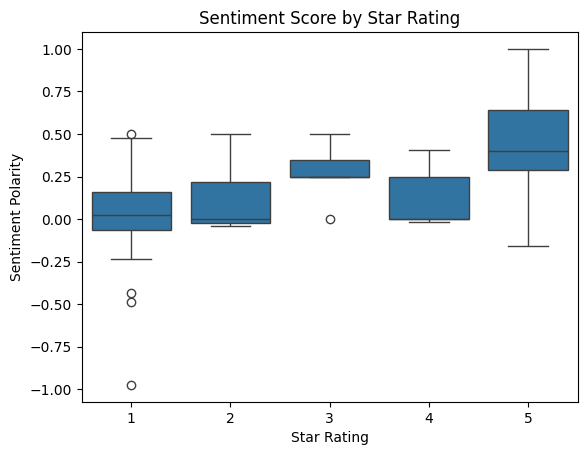

In [ ]:
# 4. Visualization
sns.boxplot(data=reviews, x='overall', y='sentiment')
plt.title('Sentiment Score by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

/tmp/ipython-input-6-1032568786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='overall', palette='viridis')


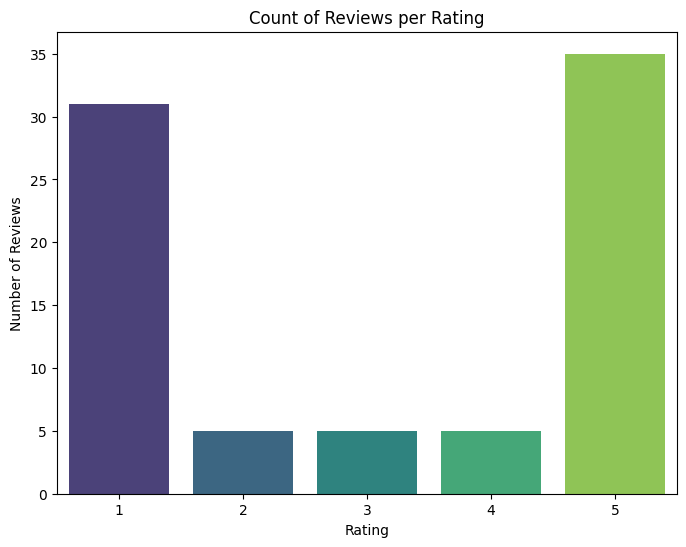

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=reviews, x='overall', palette='viridis')
plt.title('Count of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# 5. Topic Modeling
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(str(text).lower())
    return [w for w in tokens if w.isalpha() and w not in stop_words and len(w) > 2]

reviews['tokens'] = reviews['reviewText'].apply(preprocess)

In [ ]:
reviews

,reviewText,overall,sentiment,tokens
0,Absolutely love these! The cherry scent is ahh...,5,0.541667,"[absolutely, love, cherry, scent, ahhhhmazing,..."
1,I like to keep one on my belt to keep the sten...,5,-0.155556,"[like, keep, one, belt, keep, stench]"
2,I love Chemical Guys products. This air fresh...,4,0.407778,"[love, chemical, guys, products, air, freshene..."
3,Love these but I wish the smell would last lo...,4,0.250000,"[love, wish, smell, would, last, longer]"
4,Love it! I bought the 3 pack tester spray set ...,5,0.555556,"[love, bought, pack, tester, spray, set, first..."
...,...,...,...,...
76,Smells great and scent last,5,0.400000,"[smells, great, scent, last]"
77,These smell so good!!! I purchased the big pac...,5,0.232593,"[smell, good, purchased, big, pack, use, vehic..."
78,I love the products Chemical Guys make but the...,1,0.123611,"[love, products, chemical, guys, make, air, fr..."
79,Bought two packs from Walmart one day because ...,1,0.051979,"[bought, two, packs, walmart, one, day, husban..."


In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.show_topics()

[(0,
  '0.059*"smell" + 0.029*"like" + 0.023*"scent" + 0.021*"great" + 0.018*"love" + 0.016*"last" + 0.014*"long" + 0.011*"chemical" + 0.011*"new" + 0.011*"leather"'),
 (1,
  '0.025*"scent" + 0.022*"air" + 0.020*"last" + 0.020*"one" + 0.018*"fresheners" + 0.018*"good" + 0.018*"smell" + 0.013*"smells" + 0.013*"great" + 0.012*"day"'),
 (2,
  '0.034*"scent" + 0.024*"smell" + 0.024*"love" + 0.018*"air" + 0.017*"car" + 0.016*"good" + 0.014*"lasts" + 0.012*"one" + 0.012*"freshener" + 0.010*"absolutely"')]

In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.044*"smell" + 0.021*"air" + 0.021*"like" + 0.019*"scent" + 0.019*"last" + 0.017*"one" + 0.016*"car" + 0.015*"fresheners" + 0.014*"love" + 0.013*"chemical"'),
 (1,
  '0.042*"scent" + 0.020*"great" + 0.016*"love" + 0.015*"long" + 0.014*"good" + 0.010*"smells" + 0.009*"smell" + 0.008*"new" + 0.008*"pack" + 0.008*"air"')]

# Filter for <=3 ratings

In [ ]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)

/tmp/ipython-input-12-2551902449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


In [ ]:
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.023*"scent" + 0.013*"smell" + 0.013*"good" + 0.013*"something" + 0.013*"better" + 0.012*"one" + 0.012*"expected" + 0.010*"spray" + 0.008*"love" + 0.007*"waste"'),
 (1,
  '0.023*"fresheners" + 0.023*"one" + 0.023*"air" + 0.016*"smell" + 0.015*"little" + 0.015*"trees" + 0.012*"day" + 0.012*"chemical" + 0.012*"put" + 0.012*"scent"'),
 (2,
  '0.065*"smell" + 0.031*"scent" + 0.030*"last" + 0.028*"like" + 0.021*"days" + 0.018*"chemical" + 0.018*"smells" + 0.016*"day" + 0.013*"great" + 0.013*"leather"')]

# Adding common phrases

In [ ]:
from gensim.models import Phrases
bigram = Phrases(reviews['tokens'], min_count=3, threshold=5)
bigram_mod = Phrases(bigram[reviews['tokens']])
reviews['tokens'] = [bigram[doc] for doc in reviews['tokens']]

In [ ]:
reviews

,reviewText,overall,sentiment,tokens
0,Absolutely love these! The cherry scent is ahh...,5,0.541667,"[absolutely_love, cherry, scent, ahhhhmazing, ..."
1,I like to keep one on my belt to keep the sten...,5,-0.155556,"[like, keep, one, belt, keep, stench]"
2,I love Chemical Guys products. This air fresh...,4,0.407778,"[love, chemical_guys, products, air_freshener,..."
3,Love these but I wish the smell would last lo...,4,0.250000,"[love, wish, smell, would, last, longer]"
4,Love it! I bought the 3 pack tester spray set ...,5,0.555556,"[love, bought, pack, tester, spray, set, first..."
...,...,...,...,...
76,Smells great and scent last,5,0.400000,"[smells, great, scent, last]"
77,These smell so good!!! I purchased the big pac...,5,0.232593,"[smell_good, purchased, big, pack, use, vehicl..."
78,I love the products Chemical Guys make but the...,1,0.123611,"[love, products, chemical_guys, make, air_fres..."
79,Bought two packs from Walmart one day because ...,1,0.051979,"[bought, two, packs, walmart, one, day, husban..."


In [ ]:
dictionary = corpora.Dictionary(reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

[(0,
  '0.026*"scent" + 0.021*"one" + 0.016*"smell" + 0.014*"day" + 0.013*"air_freshener" + 0.013*"like" + 0.012*"car" + 0.010*"air_fresheners" + 0.010*"chemical_guys" + 0.010*"good"'),
 (1,
  '0.043*"scent" + 0.026*"great" + 0.017*"love" + 0.013*"car" + 0.013*"smells_good" + 0.010*"air_fresheners" + 0.010*"lasts" + 0.010*"air_freshener" + 0.010*"last" + 0.008*"well"'),
 (2,
  '0.065*"smell" + 0.028*"like" + 0.021*"last" + 0.019*"scent" + 0.016*"smells" + 0.015*"great" + 0.011*"love" + 0.011*"time" + 0.011*"days" + 0.011*"leather"')]

In [ ]:
negative_reviews = reviews[reviews['overall'] <= 3]
negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)
dictionary = corpora.Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(text) for text in negative_reviews['tokens']]
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=20)
lda_model.print_topics()

/tmp/ipython-input-18-1734944771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['reviewText'].apply(preprocess)


[(0,
  '0.039*"scent" + 0.022*"smell" + 0.018*"air" + 0.016*"day" + 0.014*"spray" + 0.014*"freshener" + 0.014*"worth" + 0.013*"like" + 0.010*"days" + 0.010*"something"'),
 (1,
  '0.024*"one" + 0.023*"last" + 0.023*"day" + 0.022*"fresheners" + 0.019*"air" + 0.017*"smell" + 0.016*"money" + 0.016*"little" + 0.016*"trees" + 0.013*"chemical"'),
 (2,
  '0.064*"smell" + 0.026*"scent" + 0.026*"like" + 0.021*"last" + 0.020*"chemical" + 0.020*"smells" + 0.018*"days" + 0.015*"car" + 0.015*"great" + 0.015*"one"')]

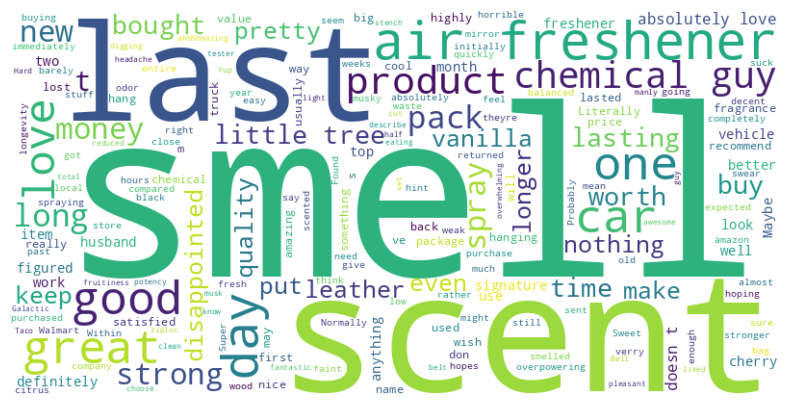

In [ ]:
from wordcloud import WordCloud

text = " ".join(reviews['reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Trying facebook model

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
candidate_labels = [
    "scent lasts long",
    "smells great",
    "disappointing longevity",
    "poor packaging",
    "worth the money",
    "too expensive",
    "chemical smell"
]


In [ ]:
review = "Smells amazing at first but fades in less than a day."

result = classifier(review, candidate_labels, multi_label=False)

print("Predicted label:", result['labels'][0])
print("Confidence:", result['scores'][0])


Predicted label: disappointing longevity
Confidence: 0.6018100380897522


In [ ]:
reviews['zero_shot_label'] = reviews['reviewText'].apply(
    lambda x: classifier(str(x), candidate_labels, multi_label=False)['labels'][0]
)

In [ ]:
reviews

,reviewText,overall,sentiment,tokens,zero_shot_label
0,Absolutely love these! The cherry scent is ahh...,5,0.541667,"[absolutely_love, cherry, scent, ahhhhmazing, ...",smells great
1,I like to keep one on my belt to keep the sten...,5,-0.155556,"[like, keep, one, belt, keep, stench]",scent lasts long
2,I love Chemical Guys products. This air fresh...,4,0.407778,"[love, chemical_guys, products, air_freshener,...",smells great
3,Love these but I wish the smell would last lo...,4,0.250000,"[love, wish, smell, would, last, longer]",disappointing longevity
4,Love it! I bought the 3 pack tester spray set ...,5,0.555556,"[love, bought, pack, tester, spray, set, first...",smells great
...,...,...,...,...,...
76,Smells great and scent last,5,0.400000,"[smells, great, scent, last]",scent lasts long
77,These smell so good!!! I purchased the big pac...,5,0.232593,"[smell_good, purchased, big, pack, use, vehicl...",smells great
78,I love the products Chemical Guys make but the...,1,0.123611,"[love, products, chemical_guys, make, air_fres...",disappointing longevity
79,Bought two packs from Walmart one day because ...,1,0.051979,"[bought, two, packs, walmart, one, day, husban...",disappointing longevity


from matplotlib import pyplot as plt
reviews['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reviews['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('zero_shot_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reviews.plot(kind='scatter', x='overall', y='sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reviews['overall'].plot(kind='line', figsize=(8, 4), title='overall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
reviews['sentiment'].plot(kind='line', figsize=(8, 4), title='sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(reviews['zero_shot_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(reviews, x='overall', y='zero_shot_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(reviews['zero_shot_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(reviews, x='sentiment', y='zero_shot_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

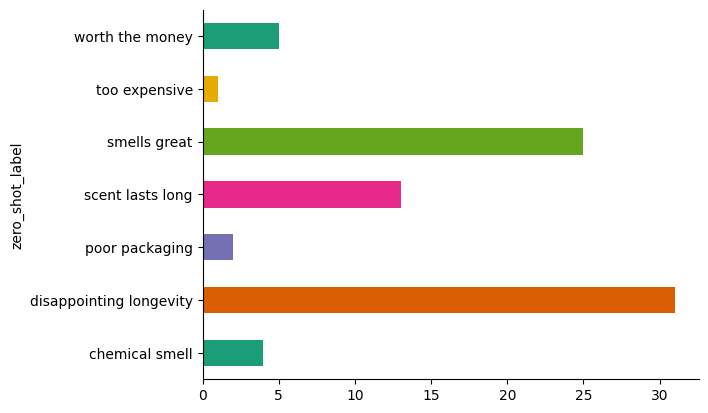

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
reviews.groupby('zero_shot_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
reviews[reviews['zero_shot_label'] == 'scent lasts long']

,reviewText,overall,sentiment,tokens,zero_shot_label
1,I like to keep one on my belt to keep the sten...,5,-0.155556,"[like, keep, one, belt, keep, stench]",scent lasts long
7,Yup you read the title correctly 🤣 Smells like...,5,0.345000,"[yup, read, title, correctly, smells, like, de...",scent lasts long
9,Wow these smell great! Very pleased with the l...,5,0.474858,"[wow, smell, great, pleased, longevity, scent,...",scent lasts long
18,I absolutely love the way these airfreshners s...,5,0.277841,"[absolutely_love, way, airfreshners, smell, sm...",scent lasts long
26,Smell last for 24 hours. Waist of money.,1,0.000000,"[smell, last, hours, waist, money]",scent lasts long
41,No smell,1,0.000000,[smell],scent lasts long
49,Scent lasts 2 days tops,2,0.000000,"[scent, lasts, days, tops]",scent lasts long
50,there not horrible but not like the scratch n ...,2,0.500000,"[horrible, like, scratch, sniff, sticker]",scent lasts long
53,Smells good. Doesn’t last more than a few days.,3,0.250000,"[smells_good, last, days]",scent lasts long
67,Great air fresheners last among time,5,0.400000,"[great, air_fresheners, last, among, time]",scent lasts long
